In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

import re


# Training Workshop Part IV - Portfolio analysis

In [2]:
stock = pd.read_csv('1Y_Stock_Data.csv')
stock['Symbol'].unique()

array(['AAPL', 'BABA', 'JD', 'FB', 'GS'], dtype=object)

In [4]:
stock.head()

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,26/02/2018,AAPL,176.350006,179.389999,176.210007,178.970001,176.285675,38162200
1,27/02/2018,AAPL,179.100006,180.479996,178.160004,178.389999,175.714386,38928100
2,28/02/2018,AAPL,179.259995,180.619995,178.050003,178.119995,175.448410,37782100
3,01/03/2018,AAPL,178.539993,179.779999,172.660004,175.000000,172.375214,48802000
4,02/03/2018,AAPL,172.800003,176.300003,172.449997,176.210007,173.567078,38454000


In [5]:
stock.columns = stock.columns.map(lambda x: x.lower())
stock.rename(columns={'adj close':'adj_close'},inplace=True)
stock['date']=pd.to_datetime(stock['date'],format='%d/%m/%Y')

In [6]:
stock.set_index(['date', 'symbol'], inplace=True)

In [8]:
daily_price = stock['adj_close'].unstack()
daily_ret = daily_price.pct_change().dropna()
daily_ret.columns = daily_ret.columns.map(lambda x: x + '_return')

In [9]:
daily_ret.head(20)

symbol,AAPL_return,BABA_return,FB_return,GS_return,JD_return
date,,,,,
2018-02-27,-0.003241,-0.030537,-0.018764,-0.012276,-0.036066
2018-02-28,-0.001514,-0.011261,-0.017304,-0.015907,0.002338
2018-03-01,-0.017516,-0.022295,-0.013347,-0.023390,-0.019936
2018-03-02,0.006914,-0.012253,0.003865,0.005219,-0.052153
2018-03-05,0.003462,0.010236,0.021402,0.019371,-0.018493
2018-03-06,-0.000848,0.031773,-0.003437,0.014480,0.003489
2018-03-07,-0.009283,0.008966,0.021860,-0.005919,0.029439
2018-03-08,0.010912,-0.009892,-0.007457,0.003731,0.022067
2018-03-09,0.017181,0.018004,0.015850,0.016633,0.007050


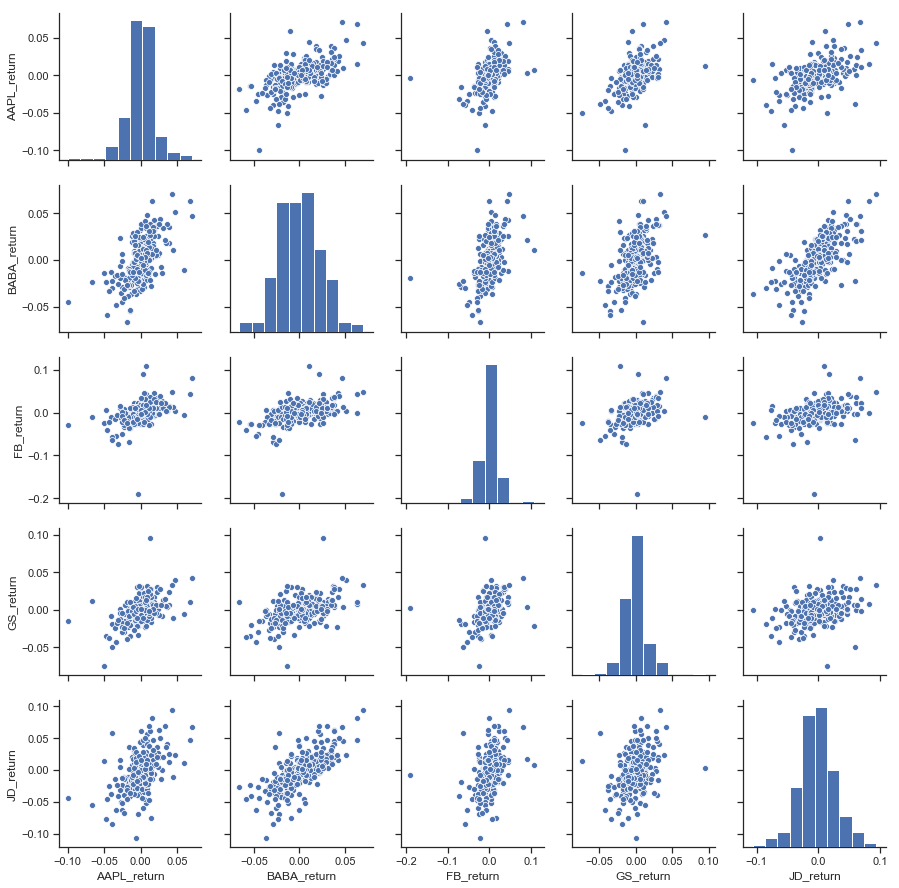

In [10]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(daily_ret)

In [11]:
# check worst drop in each stock
daily_ret.idxmin()

symbol
AAPL_return   2019-01-03
BABA_return   2018-10-29
FB_return     2018-07-26
GS_return     2018-11-12
JD_return     2018-09-05
dtype: datetime64[ns]

In [12]:
# JD_return     2018-09-05
# Richard Liu rape allegation on 2018-09-02

In [13]:
daily_ret.idxmax()

symbol
AAPL_return   2018-12-26
BABA_return   2019-01-04
FB_return     2019-01-31
GS_return     2019-01-16
JD_return     2019-01-04
dtype: datetime64[ns]

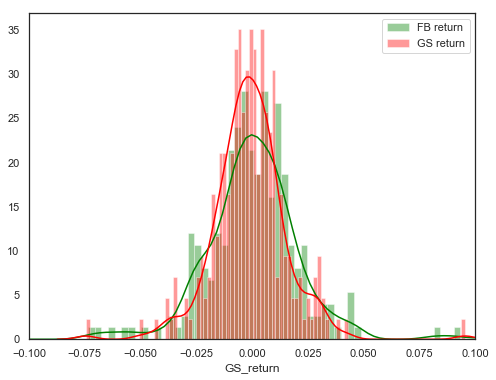

In [17]:
# compare std of returns between FB and GS
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
sns.distplot(daily_ret.loc[:,'FB_return'],color='green',bins=100,label='FB return')
sns.distplot(daily_ret.loc[:,'GS_return'],color='red',bins=100, label='GS return')
ax.legend(loc=0)
ax.set_xlim(-0.1,0.1)
plt.show()

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

# Optional Plotly Method Imports
#import plotly



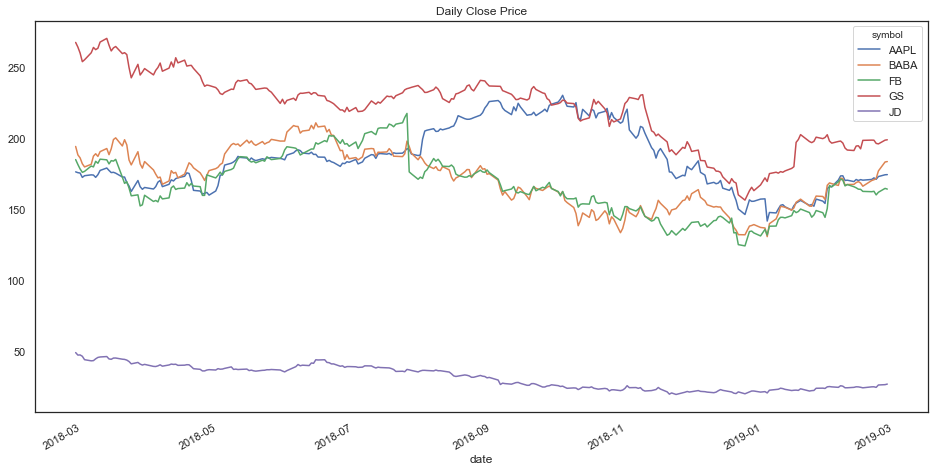

In [20]:
daily_price.plot(figsize=(16,8),title='Daily Close Price')


## draw moving average

In [21]:
# use FB as example
ma_days = [5,30]
fb = daily_price['FB'].to_frame()
for d in ma_days:
    column_name = 'MA_%s_days' % str(d)    
    fb[column_name] = daily_price.rolling(window=d, min_periods=1).mean()['FB']
    column_name = 'STD_%s_days' % str(d)    
    fb[column_name] = daily_price.rolling(window=d, min_periods=1).std()['FB']
fb.head(10)

,FB,MA_5_days,STD_5_days,MA_30_days,STD_30_days
date,,,,,
2018-02-26,184.929993,184.929993,NaN,184.929993,NaN
2018-02-27,181.460007,183.195000,2.453651,183.195000,2.453651
2018-02-28,178.320007,181.570002,3.306366,181.570002,3.306366
2018-03-01,175.940002,180.162502,3.900290,180.162502,3.900290
2018-03-02,176.619995,179.454001,3.730827,179.454001,3.730827
2018-03-05,180.399994,178.548001,2.370681,179.611666,3.359227
2018-03-06,179.779999,178.211999,1.933524,179.635714,3.067200
2018-03-07,183.710007,179.289999,3.136880,180.145000,3.184139
2018-03-08,182.339996,180.569998,2.704074,180.388889,3.067040


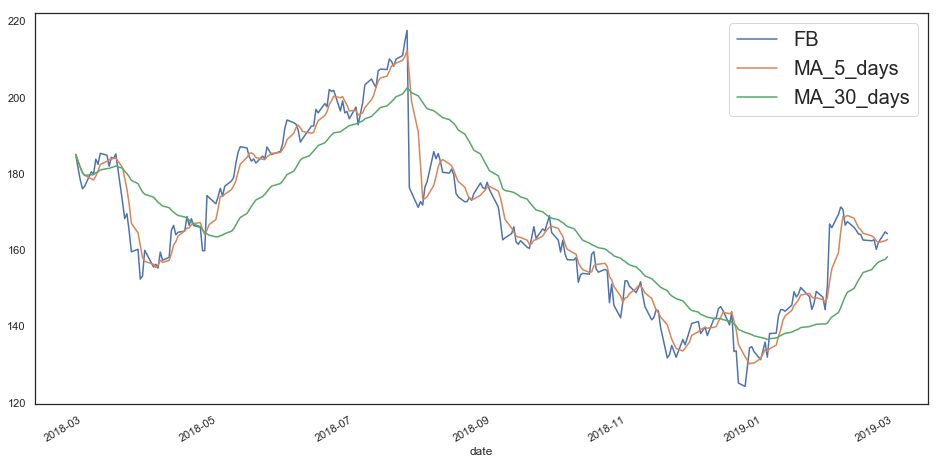

In [22]:
fb.loc[:,['FB', 'MA_5_days', 'MA_30_days']].plot(figsize=(16,8))
plt.legend(prop={'size': 20})
plt.show()

## correlation and risk

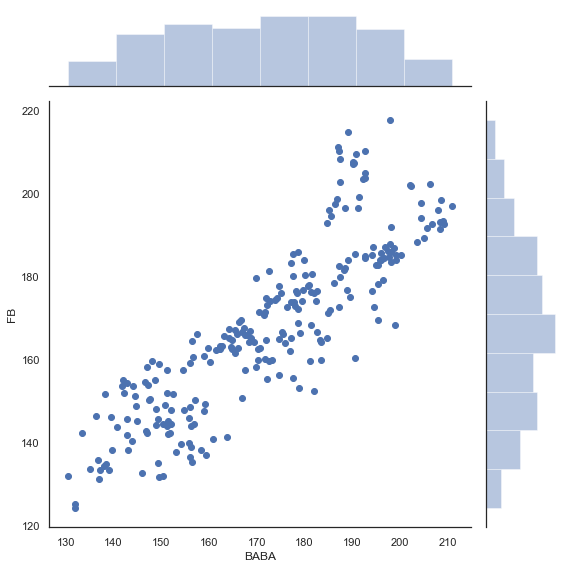

In [23]:
# scatter plot to find correlation
# FB and BABA stock price are quite correlated
sns.jointplot('BABA', 'FB', daily_price, kind='scatter', height=8)
plt.show()

In [24]:
# from correlation function we can see BABA and FB correlation is high
daily_price.corr()

symbol,AAPL,BABA,FB,GS,JD
symbol,,,,,
AAPL,1.000000,-0.011970,0.220081,0.344061,-0.067267
BABA,-0.011970,1.000000,0.866633,0.641122,0.866331
FB,0.220081,0.866633,1.000000,0.598703,0.766973
GS,0.344061,0.641122,0.598703,1.000000,0.804502
JD,-0.067267,0.866331,0.766973,0.804502,1.000000


In [25]:
# std of returns
daily_ret.std()

symbol
AAPL_return    0.019195
BABA_return    0.022783
FB_return      0.024647
GS_return      0.016522
JD_return      0.029738
dtype: float64

In [26]:
# add uppper and lower band (std)
fb['upper_band_30'] = fb['MA_30_days'] + (fb['STD_30_days'] * 2)
fb['lower_band_30'] = fb['MA_30_days'] - (fb['STD_30_days'] * 2)


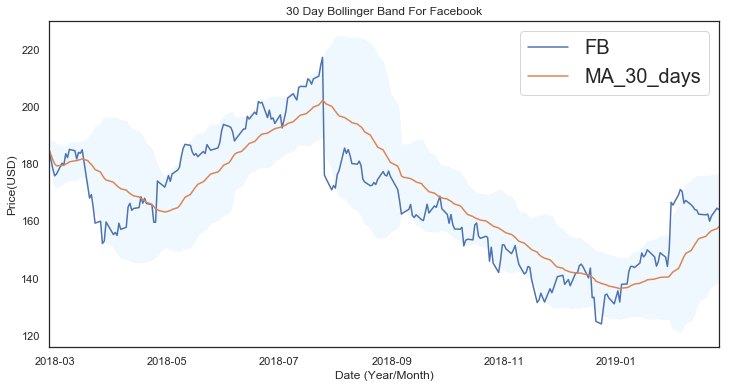

In [27]:
# set style, empty figure and axes
#plt.style.use('ggplot')
sns.set_style('white')

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

# Get index values for the X axis for facebook DataFrame
x_axis = fb.index

# Plot shaded 21 Day Bollinger Band for Facebook
ax.fill_between(x_axis, fb['upper_band_30'], fb['lower_band_30'], color='aliceblue')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, fb['FB'])#, color='blue', lw=2)
ax.plot(x_axis, fb['MA_30_days'])#, color='black', lw=2)

# Set Title & Show the Image
ax.set_title('30 Day Bollinger Band For Facebook')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.set_xlim(fb.index.min(), fb.index.max())

ax.legend()

plt.legend(prop={'size': 20})
plt.show()

In [452]:
fb.index.min().strftime('%Y-%d')

'2018-26'